In [1]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Getting price data and selecting adjusted price columns:
sprices = pdr.get_data_yahoo(['ALFAA.MX','^MXX'],start="01/01/2018", end="07/31/2022",interval="m")
sprices = sprices['Adj Close']

# Calculating returns:
sr = np.log(sprices) - np.log(sprices.shift(1))
# Deleting the first month with NAs:
sr=sr.dropna()
sr.columns=['ALFAA','MXX']

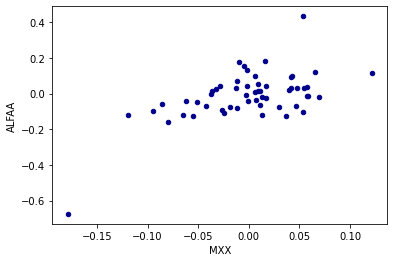

In [2]:
sr.plot.scatter(x='MXX', y='ALFAA',c='DarkBlue')
plt.show()

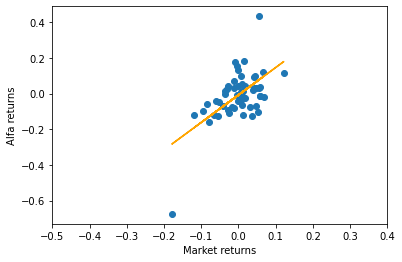

In [3]:
# Scatter plots can be misleading when ranges of X and Y are very different.
# In this case, Alfa had a very bad month in the COVID crisis with more than 60% loss!! 
# Then, we can re-do the scatter plot trying to make the X and Y axis using the same range of values 
plt.clf()
x=sr['MXX']
y = sr['ALFAA']
plt.scatter(x, y)
# Now I add the regression line:
b1,b0 = np.polyfit(x,y,1)
yfit = b0+b1*x

plt.plot(x, yfit,c="orange")

plt.xticks(np.arange(-0.50,0.5,0.1))
plt.xlabel("Market returns")
plt.ylabel("Alfa returns")

plt.show()

WE CAN TELL THERE IS A DIRECT RELATION BETWEEN THE MEXICAN MARKET RETURNS AND THE ALFA RETURNS, BECAUSE WHEN ONE GOES UP, THE OTHER ONE GOES UP TOO

In [6]:
import statsmodels.api as sm
X = sm.add_constant(x)

mkmodel = sm.OLS(y,X).fit()
 
print(mkmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                  ALFAA   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     28.69
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           1.87e-06
Time:                        23:06:28   Log-Likelihood:                 43.927
No. Observations:                  55   AIC:                            -83.85
Df Residuals:                      53   BIC:                            -79.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0079      0.015     -0.526      0.6

In [7]:
# Using matrix algebra to estimate the beta coefficients:
sr['constant'] = 1
selcols = ['constant','MXX']
x = sr[selcols].values
y = sr['ALFAA'].values

xtx = np.matmul(x.transpose(),x)
xty = np.matmul(x.transpose(),y)
invtxt = np.linalg.inv(xtx)

betas = np.matmul(invtxt,xty)
betas

array([-0.00786281,  1.53894487])

THEN THE REGRESSION ECUATION WOULD BE 1.5389*X - 0.0078
THE X BEING THE RETURNS IN THE MEX MARKET

DUE TO THE BETA1 IS BIGGER THAN 1, WE KNOW THAT THE STOCK OF ALFA IS MORE RISKY THAN THE MARKET.

WHEN THE MARKET RETURNS ARE 0, THEN WE CAN EXPECT THE ALFAS'S STOCK RETURNS TO BE 0 SINCE THE STOCK IS NOT OFFERING A VERY DIFFERENT RETURN THAN THE MARKET, AND WE CAN KNOW THIS BECAUSE THE BETA0 IS EQUAL TO 0